<a href="https://colab.research.google.com/github/pratheeshsailor/Dynamic-Pricing-Optimization-for-E-commerce-Retail/blob/main/Dynamic_Pricing_Optimization_for_E_commerce_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Dynamic Pricing Optimization for E-commerce Retail**
**Project Overview**

This project aims to develop and deploy a dynamic pricing model that optimizes prices for various product categories based on demand, competitor pricing, and customer behavior. By implementing this model, the e-commerce company can respond to market changes in real-time, maximize revenue, and improve competitiveness.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('ElectronicsProductsPricingData.csv')

In [ ]:
df.head(3).T

,0,1,2
id,AVphzgbJLJeJML43fA0o,AVpgMuGwLJeJML43KY_c,AVpgMuGwLJeJML43KY_c
prices.amountMax,104.99,69.0,69.0
prices.amountMin,104.99,64.99,69.0
prices.availability,Yes,In Stock,In Stock
prices.condition,New,New,New
prices.currency,USD,USD,USD
prices.dateSeen,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",2017-12-14T06:00:00Z,2017-09-08T05:00:00Z
prices.isSale,False,True,False
prices.merchant,Bestbuy.com,Walmart.com,Walmart.com
prices.shipping,NaN,Expedited,Expedited


In [ ]:
df.dtypes

,0
id,object
prices.amountMax,float64
prices.amountMin,float64
prices.availability,object
prices.condition,object
prices.currency,object
prices.dateSeen,object
prices.isSale,bool
prices.merchant,object
prices.shipping,object


In [ ]:
# strings only properties
df.describe(include='O')

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.merchant,prices.shipping,prices.sourceURLs,asins,brand,...,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 29,Unnamed: 30
count,7249,7249,7249,7249,7249,7249,4277,7249,7249,7249,...,7249,7249,7249,7249,7249,7249,39,18,12,6
unique,835,14,11,2,3834,693,74,4323,835,257,...,835,828,5,835,392,587,2,2,1,1
top,AV1YFZVDvKc47QAVgp7V,In Stock,New,USD,2018-05-26T15:00:00Z,Bestbuy.com,Free Expedited Shipping for most orders over $49,http://www.bestbuy.com/site/lenovo-yoga-710-2-...,"B00EHBERSE,B00F0EIKJO",Sony,...,WD40EFRX,"4TB Network OEM HDD Retail Kit (8-Pack, WD40EF...",Electronics,http://reviews.bestbuy.com/3545/2452034/review...,8.87E+11,1 pounds,19048215475,8.89E+11,6.3 pounds,4.8 pounds
freq,59,3172,6226,7248,128,2806,1449,13,59,785,...,59,59,7196,59,693,165,27,12,12,6


In [ ]:
print('Shape of Dataset - ',df.shape)
print('Total No. of News Articles - ',df['primaryCategories'].nunique(),':',df['primaryCategories'].unique())
print('News Article per category - \n',df['primaryCategories'].value_counts())
print('Shape of Dataset - ',df.shape)
#print('\nInfo - \n',df.info)

Shape of Dataset -  (7249, 31)
Total No. of News Articles -  5 : ['Electronics' ' Siri Eyes Free' 'Electronics,Furniture' ' Intel Celeron'
 ' Apple CarPlay']
News Article per category - 
 primaryCategories
Electronics              7196
 Apple CarPlay             27
 Intel Celeron             12
Electronics,Furniture       8
 Siri Eyes Free             6
Name: count, dtype: int64
Shape of Dataset -  (7249, 31)


In [ ]:
# columsn to be kept

colu = ['prices.amountMax',
                 'prices.amountMin',
                 'prices.availability',
                 'prices.condition',
                 'prices.dateSeen',
                 'dateAdded',
                 'dateUpdated',
                 'prices.isSale',
                 'prices.shipping',
                 'brand',
                 'categories',
                 'primaryCategories',
                 'prices.merchant', 'name'
                 ]
df = df.filter(items=colu,axis=1)

In [ ]:
condit1 = 'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"'
condit2 = '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties'
df['prices.condition'] = df['prices.condition'].map({
                                'New':1,
                                'new':1,
                                'Seller refurbished':0,
                                'Used':0,
                                'pre-owned':0,'Refurbished':0,
                                'Manufacturer refurbished':0,
                                'New other (see details)':1,
                                'refurbished':0,
                                'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"':1,
                                '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties':1

})

In [ ]:
# 1= yes,0=No

df['prices.availability'] = df['prices.availability'].map({
                                'Yes':1,
                                'In Stock':1,
                                'TRUE':1,
                                'undefined':0,
                                'Out Of Stock':0,
                                'Special Order':1,
                                'No':1,
                                'More on the Way':1,
                                'sold':0,
                                'FALSE':0, 'Retired':0,
                                '32 available':1,
                                '7 available':1,
                                'yes':1
})


# True:1,false:0
df['prices.isSale'] = df['prices.isSale'].map({
                                                False:0,
                                                True:1
})
df['prices.shipping'] = df['prices.shipping'].map({'Expedited':1, 'Value':1, 'Standard':1, 'Free Shipping':0,
                                     'Free Shippingon orders 35 and up':0, 'Free Expedited Shipping':0,
                                     'Free Shipping on orders 35 and up':0, 'Free Expedited Shipping for most orders over $49':0,
                                     'FREE':0, 'Freight':1, 'Free Shipping for this Item':0,
                                     'Free Standard Shipping on Orders Over $49':0, 'Free Delivery':0,
                                     'Shipping Charges Apply':1, 'Free Standard Shipping':0,
                                     'Free Next Day Delivery (USA)':0}).fillna(1)

In [ ]:
df['primaryCategories_id'] = df['primaryCategories'].map({'Electronics':0, ' Siri Eyes Free':1, 'Electronics,Furniture':2,
       ' Intel Celeron':3, ' Apple CarPlay':4})

In [ ]:
# We will treat this column, after a short period because there are nulls and other anamolies to be fixed before doing this.
df['categories']

,categories
0,"Audio & Video Accessories,TV Mounts,TV Accesso..."
1,"Stereos,Portable Bluetooth Speakers,TV, Video ..."
2,"Stereos,Portable Bluetooth Speakers,TV, Video ..."
3,"Stereos,Portable Bluetooth Speakers,TV, Video ..."
4,"Stereos,Portable Bluetooth Speakers,TV, Video ..."
...,...
7244,"Camera & Photo Accessories,Cameras, Camcorders..."
7245,"Camera & Photo Accessories,Cameras, Camcorders..."
7246,"Camera & Photo Accessories,Cameras, Camcorders..."
7247,"Camera & Photo Accessories,Cameras, Camcorders..."


In [ ]:
df['brand'].value_counts()

,count
brand,
Sony,785
Samsung,744
Apple,248
Yamaha,240
Pioneer,176
...,...
Hauppauge,1
Sonax,1
Zubie,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prices.amountMax      7249 non-null   float64
 1   prices.amountMin      7249 non-null   float64
 2   prices.availability   7249 non-null   int64  
 3   prices.condition      7249 non-null   int64  
 4   prices.dateSeen       7249 non-null   object 
 5   dateAdded             7249 non-null   object 
 6   dateUpdated           7249 non-null   object 
 7   prices.isSale         7249 non-null   int64  
 8   prices.shipping       7249 non-null   float64
 9   brand                 7249 non-null   object 
 10  categories            7249 non-null   object 
 11  primaryCategories     7249 non-null   object 
 12  prices.merchant       7249 non-null   object 
 13  name                  7249 non-null   object 
 14  primaryCategories_id  7249 non-null   int64  
dtypes: float64(3), int64(

In [ ]:
df.isna().sum()

,0
prices.amountMax,0
prices.amountMin,0
prices.availability,0
prices.condition,0
prices.dateSeen,0
dateAdded,0
dateUpdated,0
prices.isSale,0
prices.shipping,0
brand,0


In [ ]:
df.count()

,0
prices.amountMax,7249
prices.amountMin,7249
prices.availability,7249
prices.condition,7249
prices.dateSeen,7249
dateAdded,7249
dateUpdated,7249
prices.isSale,7249
prices.shipping,7249
brand,7249


In [ ]:
# lets deal with NAN in this shipping column
df['prices.shipping'].fillna(method='bfill',inplace=True)

<ipython-input-125-6620753a5229>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prices.shipping'].fillna(method='bfill',inplace=True)
<ipython-input-125-6620753a5229>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prices.shipping'].fillna(method='bfill',inplace=True)


In [ ]:
# converting dates objects into real date format
df['dateAdded'] = df['dateAdded'].apply(lambda x: pd.to_datetime(x,errors='coerce',utc=True))
df['dateUpdated'] = df['dateUpdated'].apply(lambda x: pd.to_datetime(x,errors='coerce',utc=True))

In [ ]:
# for `prices.dateSeen' field, we need special function to parse this object

from datetime import datetime, timezone
def dateCleaner(date):
    date = str(date).split(',')[0]
    cleaned_date = datetime.fromisoformat(date[:-1]).astimezone(timezone.utc)
    return cleaned_date
df['dateSeen'] = df['prices.dateSeen'].map(dateCleaner)

In [ ]:
# delated the old `prices.dateSeen` field, as we don't need this anymore
df.drop(columns='prices.dateSeen',axis=1,inplace=True)

In [ ]:
df.head(2)

,prices.amountMax,prices.amountMin,prices.availability,prices.condition,dateAdded,dateUpdated,prices.isSale,prices.shipping,brand,categories,primaryCategories,prices.merchant,name,primaryCategories_id,dateSeen
0,104.99,104.99,1,1,2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,0,1.0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Electronics,Bestbuy.com,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,0,2017-03-30 06:00:00+00:00
1,69.00,64.99,1,1,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,1,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics,Walmart.com,Boytone - 2500W 2.1-Ch. Home Theater System - ...,0,2017-12-14 06:00:00+00:00


In [ ]:
df.dtypes

,0
prices.amountMax,float64
prices.amountMin,float64
prices.availability,int64
prices.condition,int64
dateAdded,"datetime64[ns, UTC]"
dateUpdated,"datetime64[ns, UTC]"
prices.isSale,int64
prices.shipping,float64
brand,object
categories,object


In [ ]:
# prices.shipping format type to integer
df['prices.shipping'] = df['prices.shipping'].astype('int64')

In [ ]:
# rename of columns
df = df.rename(columns={
                    'prices.amountMax':'MaxPrice', 'prices.amountMin':'MinPrice', 'prices.availability':'Availability',
                    'prices.condition':'isNew','prices.merchant':'Merchant',
                    'prices.isSale':'isSale','prices.shipping':'Shipping', 'brand':'Brand',
                    'categories':'Categories', 'dateAdded':'DateAdded', 'dateUpdated':'DateUpdated'
})

In [ ]:
# take copy of `df`
df1 = df.copy()

In [ ]:
# lets extract total days by substracting from base

from datetime import datetime

dat2 = df1.sort_values(by='dateSeen', ascending=False)
base = df1['dateSeen'].min() # base

df1['seenTotalDays'] = (dat2['dateSeen'] - base)

In [ ]:
# also extract total years in fraction

from dateutil.relativedelta import relativedelta

# Assuming df1 is your DataFrame and 'dateSeen' is a datetime column

# Sort the DataFrame by 'dateSeen' in ascending order
dat2 = df1.sort_values(by='dateSeen', ascending=False)

# Find the earliest 'dateSeen' as the base date
base = dat2['dateSeen'].min()
# Calculate the difference in years as fractions
df1['seenTotalYears'] = df1['dateSeen'].apply(lambda x: relativedelta(x, base).years + relativedelta(x, base).months / 12.0)

# Now, df1['seenTotalYears'] contains the difference in years as fractions

In [ ]:
# Also calculating average price using Max and Min price fields
df1['Average_Price'] = (df1['MaxPrice'] + df1['MinPrice'])/2

In [ ]:
# mapping for primary categories
df1['primaryCategories'] = df1['primaryCategories'].map({
                            ' Siri Eyes Free':'Auto Electronics',
                            ' Apple CarPlay': 'Auto Electronics',
                            'Electronics,Furniture':'Multimedia Electronics',
                            'Electronics':'Multimedia Electronics',
                            ' Intel Celeron':'Computers'
})

In [ ]:
df1.head(3)

,MaxPrice,MinPrice,Availability,isNew,DateAdded,DateUpdated,isSale,Shipping,Brand,Categories,primaryCategories,Merchant,name,primaryCategories_id,dateSeen,seenTotalDays,seenTotalYears,Average_Price
0,104.99,104.99,1,1,2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,0,1,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Multimedia Electronics,Bestbuy.com,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,0,2017-03-30 06:00:00+00:00,942 days 14:00:00,2.50,104.990
1,69.00,64.99,1,1,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,1,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Multimedia Electronics,Walmart.com,Boytone - 2500W 2.1-Ch. Home Theater System - ...,0,2017-12-14 06:00:00+00:00,1201 days 14:00:00,3.25,66.995
2,69.00,69.00,1,1,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,0,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Multimedia Electronics,Walmart.com,Boytone - 2500W 2.1-Ch. Home Theater System - ...,0,2017-09-08 05:00:00+00:00,1104 days 13:00:00,3.00,69.000


<Axes: >

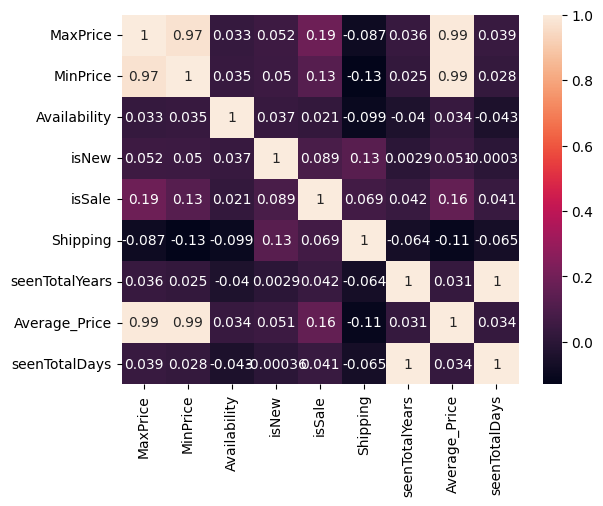

In [ ]:
corret = df1.filter(items=['MaxPrice','MinPrice','Availability','isNew','isSale','Shipping','seenTotalYears','Average_Price','seenTotalDays'])
sns.heatmap(corret.corr(),annot=True)

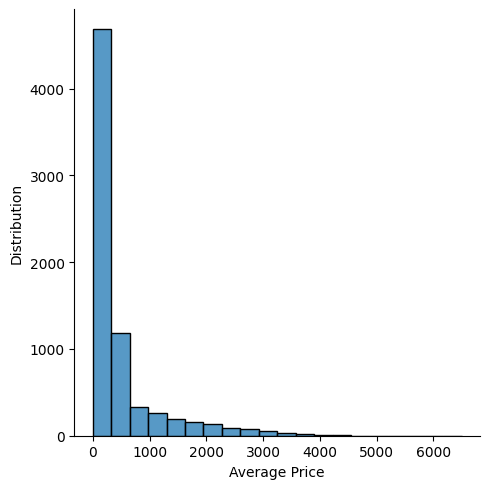

In [ ]:
# price distribution
ax = sns.displot(data=df1,x='Average_Price',bins=20)
ax.set_axis_labels(x_var="Average Price", y_var='Distribution')

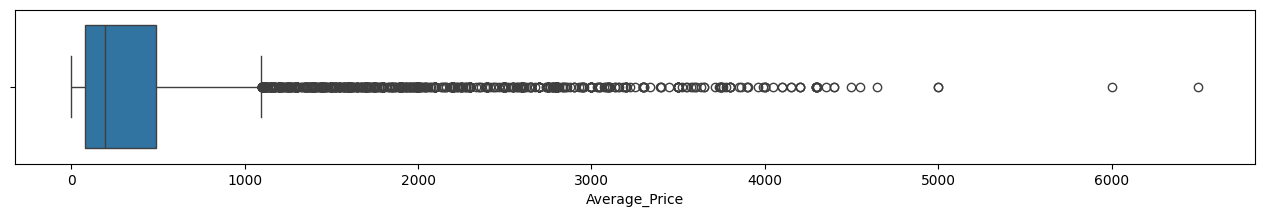

In [ ]:
# boxplot
plt.figure(figsize=(16,2))
ax = sns.boxplot(data = df1, x='Average_Price')

In [ ]:
# labels of datasets
list_label = [x for x in df1.columns]
pd.Series(list_label)

,0
0,MaxPrice
1,MinPrice
2,Availability
3,isNew
4,DateAdded
5,DateUpdated
6,isSale
7,Shipping
8,Brand
9,Categories


<Figure size 1000x1500 with 0 Axes>

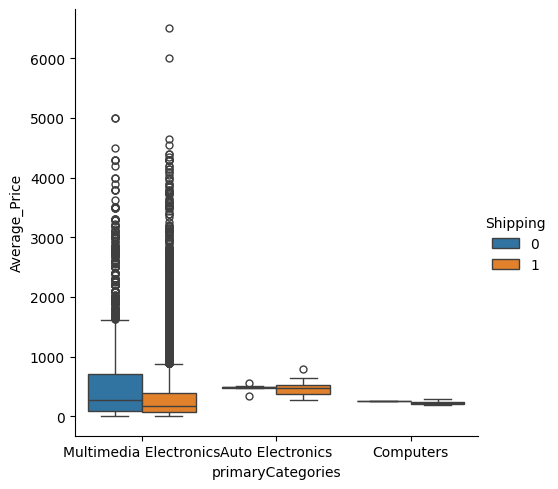

In [ ]:
# distribution by product category clasified by sale

plt.figure(figsize=(10,15))
sns.catplot(data=df1,x='primaryCategories',y='Average_Price',kind='box',hue=list_label[-11])

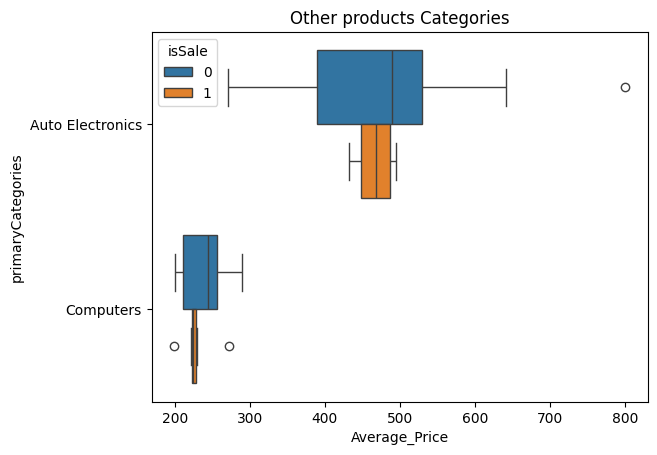

In [ ]:
def multimidea(data):
    mm = data.filter(items=['primaryCategories','Average_Price','isSale'])
    mm2 = mm.loc[(mm['primaryCategories'] == 'Auto Electronics') | (mm['primaryCategories'] == 'Computers')]

    ax = sns.boxplot(data = mm2, x='Average_Price',y='primaryCategories',hue='isSale')
    ax.set_title('Other products Categories')

multimidea(df1)

In [ ]:
# lets look at statistical positions of our prices
tendacy_central = df1.groupby('primaryCategories')['Average_Price'].agg(
                                                                Mean=(np.mean),
                                                                Median=('median'),
                                                                Std=(np.std)
                                                                ).reset_index()
tendacy_central

<ipython-input-145-48a75cf4c75f>:2: FutureWarning: The provided callable <function mean at 0x7a0436b01000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tendacy_central = df1.groupby('primaryCategories')['Average_Price'].agg(
<ipython-input-145-48a75cf4c75f>:2: FutureWarning: The provided callable <function std at 0x7a0436b01120> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  tendacy_central = df1.groupby('primaryCategories')['Average_Price'].agg(


,primaryCategories,Mean,Median,Std
0,Auto Electronics,473.452424,483.95,109.948818
1,Computers,234.085000,226.94,28.937658
2,Multimedia Electronics,480.184849,189.99,718.839547


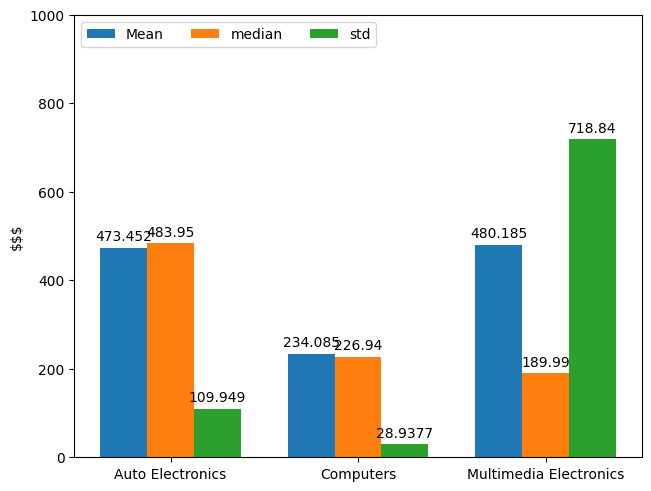

In [ ]:
# transform
primry_names = tuple(tendacy_central['primaryCategories']) # labels
names_counts = np.arange(len(primry_names)) #the label locations
mean = tuple(tendacy_central['Mean'])
median = tuple(tendacy_central['Median'])
std = tuple(tendacy_central['Std'])
stats = {
    'Mean':mean,
    'median':median,
    'std':std
}
width = 0.25
multiplier = 0

# plots
fig, ax = plt.subplots(layout='constrained')
for keys,num in stats.items():
    offset = width*multiplier
    react = ax.bar(names_counts+ offset,num,width,label=keys)
    ax.bar_label(react,padding=3)
    multiplier += 1

ax.set_ylabel('$$$')
ax.set_xticks(names_counts + width, primry_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1000)
plt.show()

In [ ]:
# looking those multimedia electroincs products, more closely
def multimedia_products(data):
    names = data.iloc[0,9].split(',')
    for x in names:
        print(x)
multimedia_products(df1)

Audio & Video Accessories
TV Mounts
TV Accessories & Parts
Electronics
A/V Presentation
Accessories & Supplies
TV Ceiling & Wall Mounts


In [ ]:
# lets clean our `Name` a bit
import re

pattern =r'^[A-Za-z\s]+ - '
df1['name'] = df1["name"].apply(lambda x: re.sub(pattern, '', x))

In [ ]:
df1.head(2)

,MaxPrice,MinPrice,Availability,isNew,DateAdded,DateUpdated,isSale,Shipping,Brand,Categories,primaryCategories,Merchant,name,primaryCategories_id,dateSeen,seenTotalDays,seenTotalYears,Average_Price
0,104.99,104.99,1,1,2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,0,1,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Multimedia Electronics,Bestbuy.com,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,0,2017-03-30 06:00:00+00:00,942 days 14:00:00,2.50,104.990
1,69.00,64.99,1,1,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,1,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Multimedia Electronics,Walmart.com,2500W 2.1-Ch. Home Theater System - Black Diamond,0,2017-12-14 06:00:00+00:00,1201 days 14:00:00,3.25,66.995


In [ ]:
mercnets_ = df1[['Merchant','name','Average_Price']] # selective fields
prduct_top = mercnets_.groupby('name')['Average_Price'].agg('mean').sort_values(ascending=False).head(5).index #top products

In [ ]:
competitive_pr = mercnets_[mercnets_['name']==prduct_top[0]]
competitive_pr = competitive_pr.groupby('Merchant')['Average_Price'].agg('mean')

In [ ]:
competitive_pr = mercnets_[mercnets_['name']==prduct_top[0]]
competitive_pr = competitive_pr.groupby('Merchant')['Average_Price'].agg('mean')

competitive_pr1 = mercnets_[mercnets_['name']==prduct_top[1]]
competitive_pr1 = competitive_pr1.groupby('Merchant')['Average_Price'].agg('mean')

competitive_pr2 = mercnets_[mercnets_['name']==prduct_top[2]]
competitive_pr2 = competitive_pr2.groupby('Merchant')['Average_Price'].agg('mean')

competitive_pr3 = mercnets_[mercnets_['name']==prduct_top[3]]
competitive_pr3 = competitive_pr3.groupby('Merchant')['Average_Price'].agg('mean')

competitive_pr4 = mercnets_[mercnets_['name']==prduct_top[4]]
competitive_pr4 = competitive_pr4.groupby('Merchant')['Average_Price'].agg('mean')

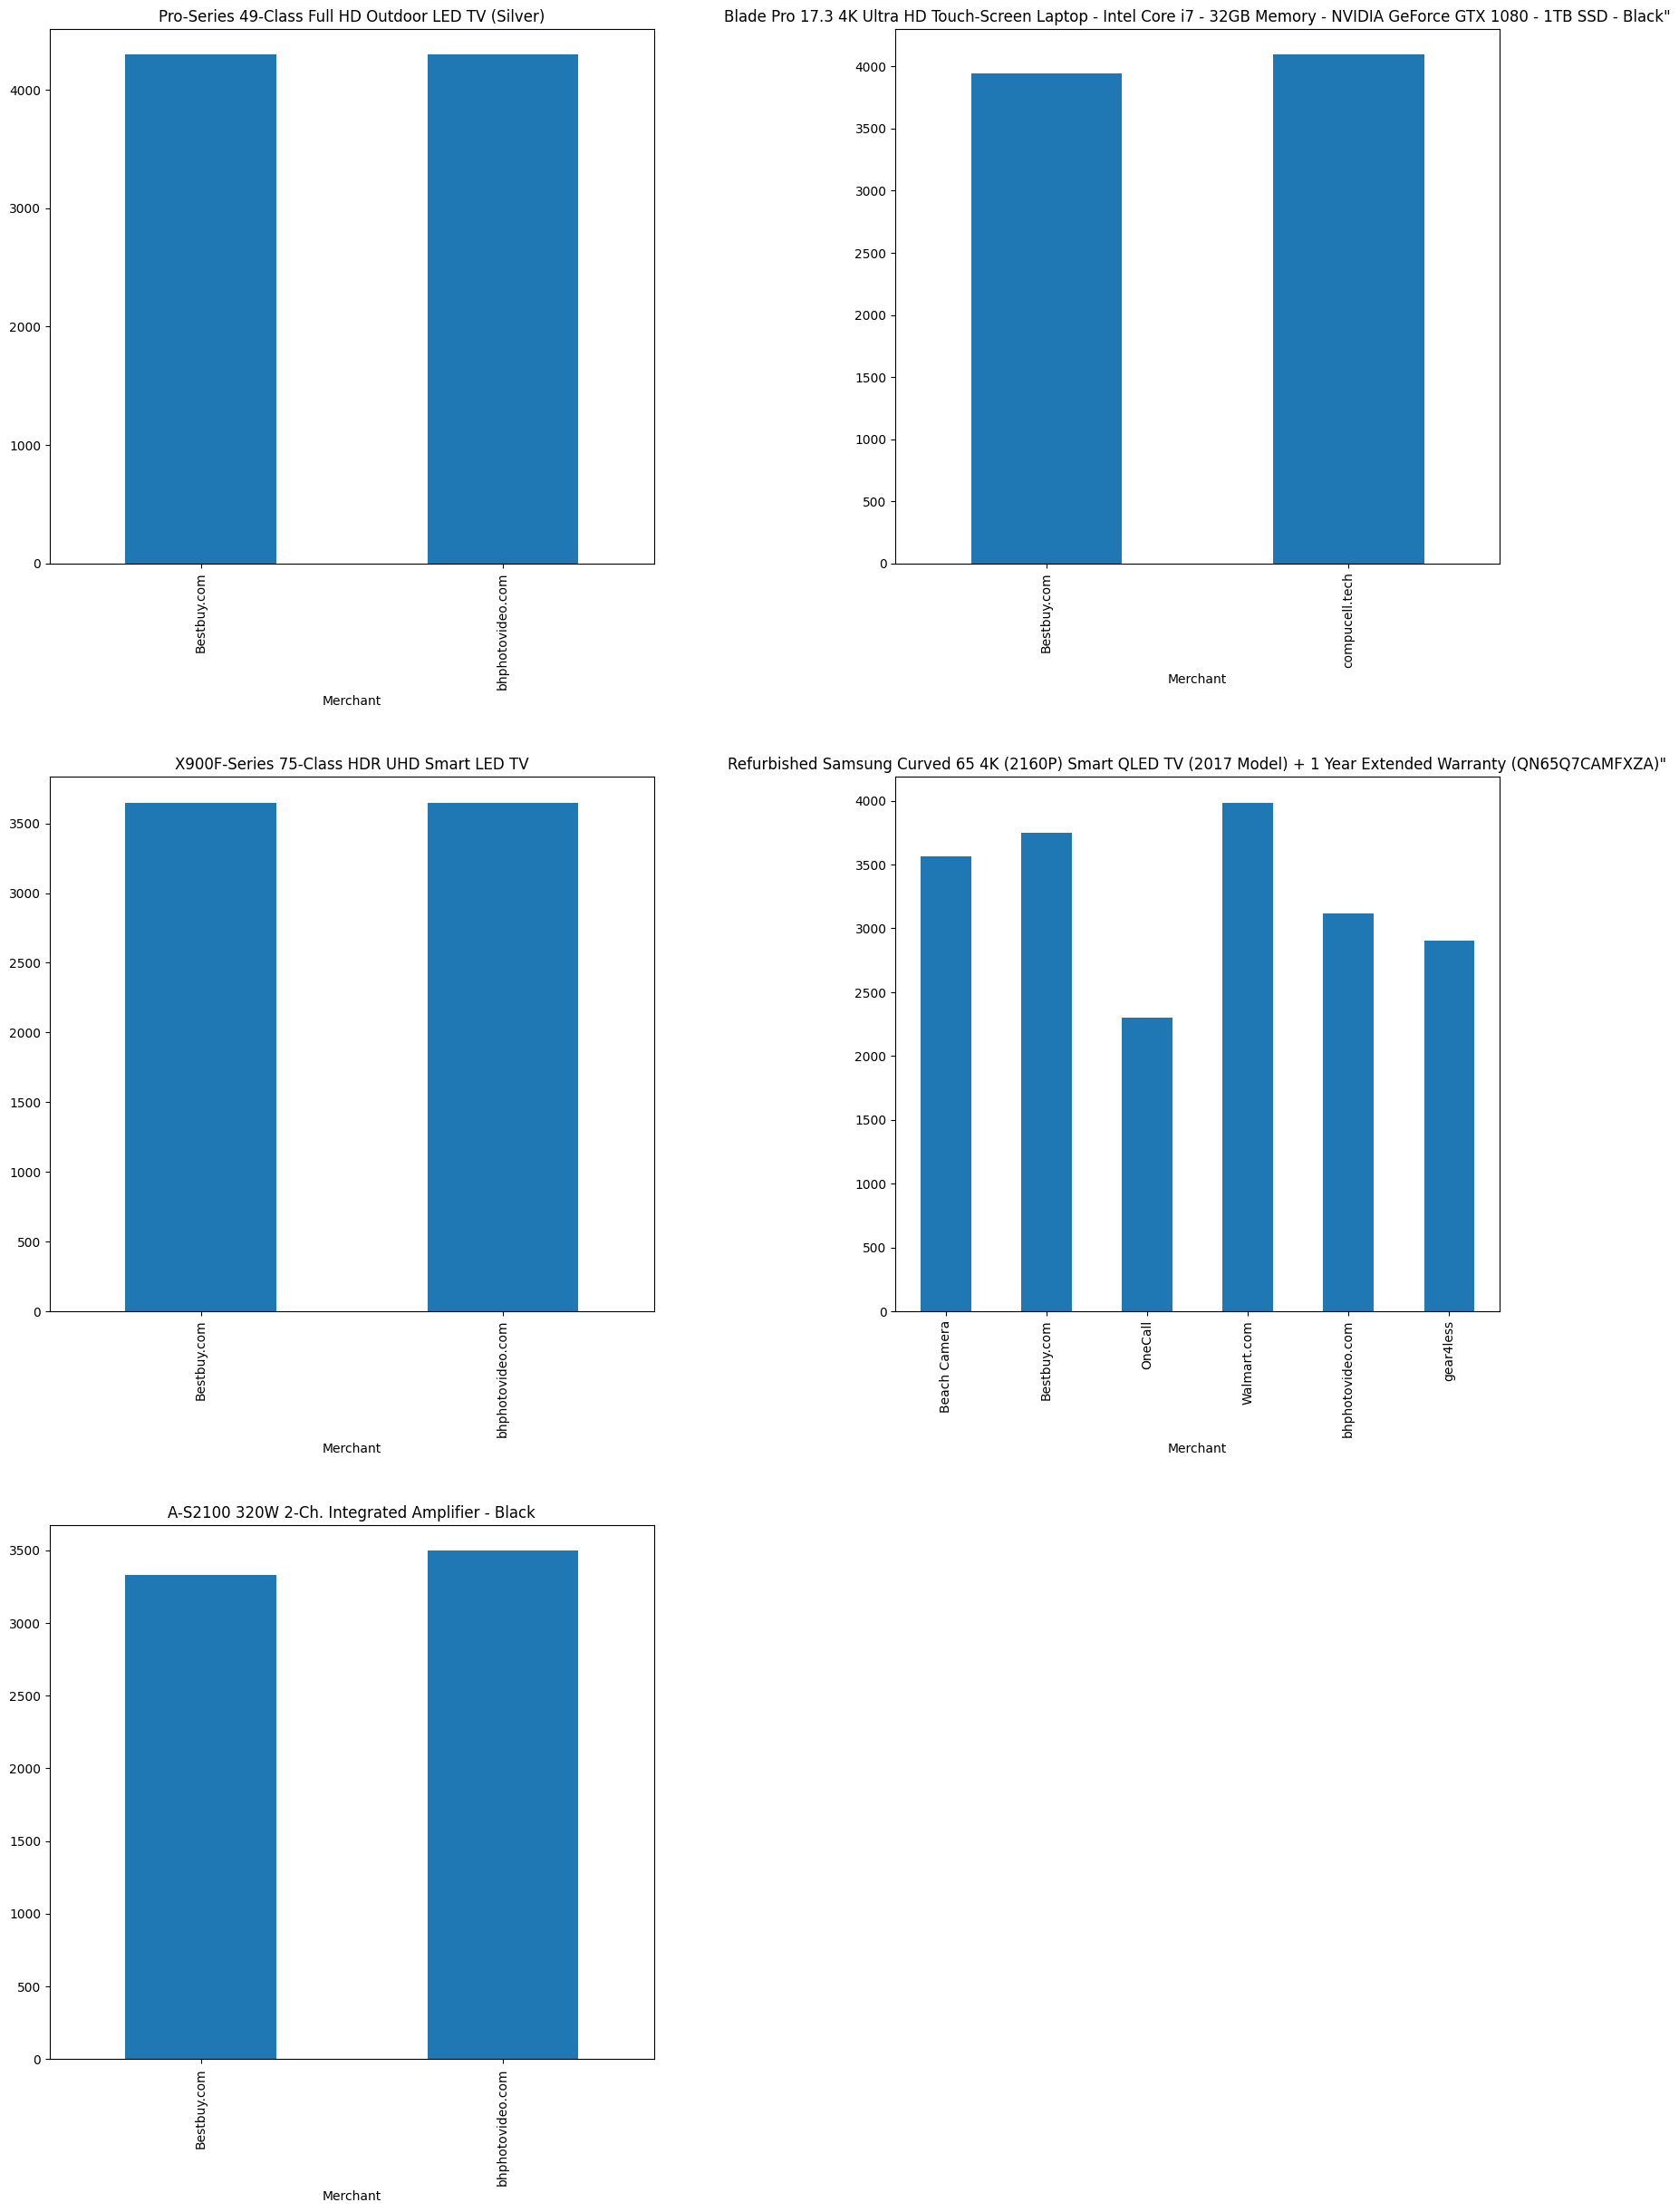

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,28))

competitive_pr.plot.bar(y='Average_Price', use_index=True, title=prduct_top[0],ax=ax[0,0])
competitive_pr1.plot.bar(y='Average_Price', use_index=True, title=prduct_top[1],ax=ax[0,1])
competitive_pr2.plot.bar(y='Average_Price', use_index=True, title=prduct_top[2], ax=ax[1,0])
competitive_pr3.plot.bar(y='Average_Price', use_index=True, title=prduct_top[3], ax=ax[1,1])
competitive_pr4.plot.bar(y='Average_Price', use_index=True, title=prduct_top[4], ax=ax[2,0])
fig.delaxes(ax[2,1]) # del last axis box
plt.subplots_adjust(left=0.1,
                    bottom=0.1,  right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [ ]:
# sales level
def rate(data):
    total_sales = sum(df1['Average_Price'])

    # multimedia
    mutipledia = data.loc[(data['primaryCategories']=='Multimedia Electronics') |(data['isSale']==1)]
    sales = sum(mutipledia['Average_Price']) / total_sales
    #Auto Electronics
    mutipledia1 = data.loc[(data['primaryCategories']=='Auto Electronics') |(data['isSale']==1)]
    sales1 =  sum(mutipledia1['Average_Price'])/ total_sales
    # 'Computers'
    mutipledia2 = data.loc[(data['primaryCategories']=='Computers') |(data['isSale']==1)]
    sales2 =  sum(mutipledia2['Average_Price'])/ total_sales
    print(f"Multimedia Electronics Sale: {sales*100:.2f}\nAuto Electronics: {sales1*100:.2f}\nComputers: {sales2*100:.2f}")

rate(df1)

Multimedia Electronics Sale: 99.59
Auto Electronics: 34.48
Computers: 34.15


How does the prices.condition affect the pricing strategy of a product?

<Axes: xlabel='MaxPrice', ylabel='Density'>

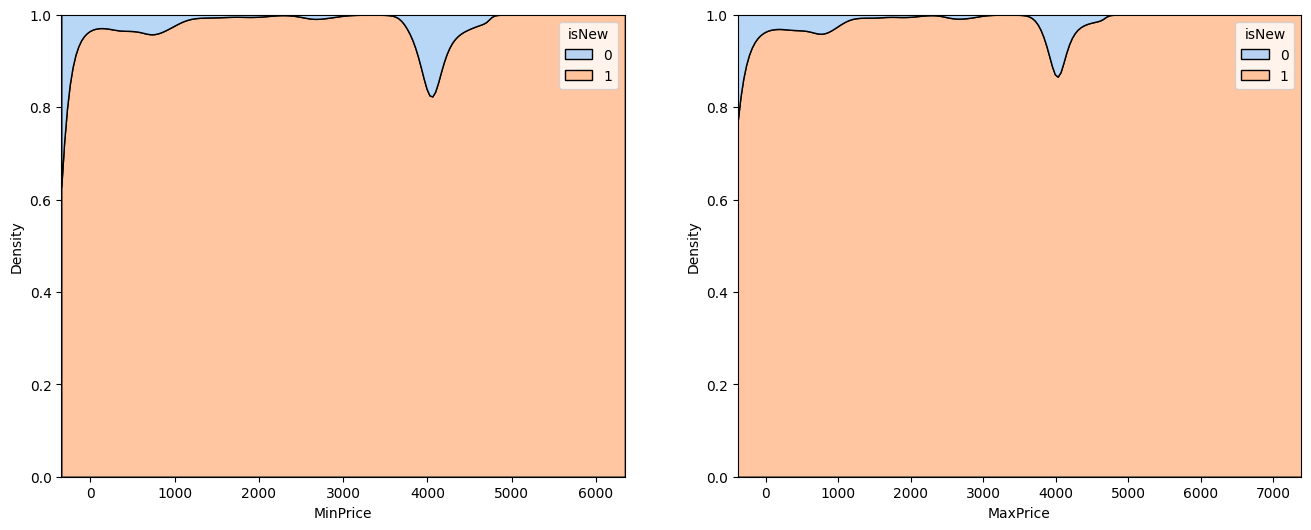

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
data = df1[['MinPrice', 'MaxPrice', 'isNew']]
sns.kdeplot(data=df1, x='MinPrice', hue='isNew', multiple='fill', ax=ax[0],palette="pastel")
sns.kdeplot(data=df1, x='MaxPrice', hue='isNew', multiple='fill', ax=ax[1],palette="pastel")

Is there a correlation between the prices.dateSeen of a product and its dynamic pricing across merchants

In [ ]:
corr_df = corret.corr()
corr_df['Average_Price'].sort_values(ascending=False)

,Average_Price
Average_Price,1.000000
MaxPrice,0.993413
MinPrice,0.991699
isSale,0.158127
isNew,0.051051
Availability,0.034200
seenTotalDays,0.033604
seenTotalYears,0.030989
Shipping,-0.107582


In [ ]:
# prices among merchant
top5_mercent = df1.groupby('Merchant')['Average_Price'].agg(sum).sort_values(ascending=False).head(5)

<ipython-input-157-88d7f9f47e5e>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top5_mercent = df1.groupby('Merchant')['Average_Price'].agg(sum).sort_values(ascending=False).head(5)


In [ ]:
mercent_ = df1[df1['Merchant'].isin(list(top5_mercent.index))].groupby('Merchant')['Average_Price']
mercent_.first()

,Average_Price
Merchant,
Beach Camera,549.000
Bestbuy.com,104.990
Walmart.com,66.995
bhphotovideo.com,149.950
gear4less,294.950


,Average_Price
Merchant,
Beach Camera,"Axes(0.125,0.11;0.775x0.77)"
Bestbuy.com,"Axes(0.125,0.11;0.775x0.77)"
Walmart.com,"Axes(0.125,0.11;0.775x0.77)"
bhphotovideo.com,"Axes(0.125,0.11;0.775x0.77)"
gear4less,"Axes(0.125,0.11;0.775x0.77)"


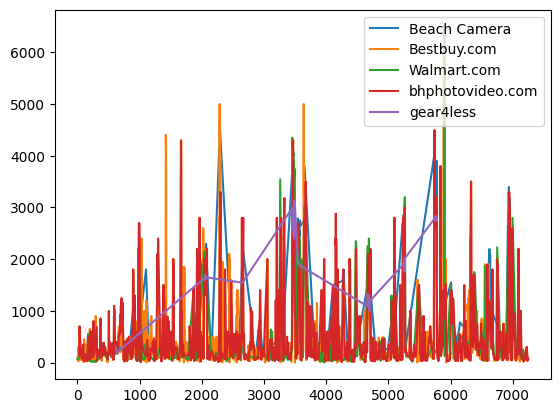

In [ ]:
mercent_.plot(legend=True)

What role does a product’s category play in its listing price?

In [ ]:
# lets group this notorous field
data4 = df1[['Categories', 'Average_Price']]
data4 = data4.groupby('Categories').agg(Count=('Average_Price', 'count')).sort_values('Count', ascending=False)
data4

,Count
Categories,
"Computers,Internal Hard Drives,Network Attached Storage Drives etryvwsrbvvvvxfutbey,Internal Drives,Drives, Storage & Blank Media,Computers & Accessories,Networking,Hard Drives (HDD, SSD & NAS),Computer Accessories & Peripherals,Internal Hard Disk Drives,Electronics,Hard Drives & Storage,Drives Storage,Computers/Tablets & Networking,Computer Components,NAS Servers,Computers & Tablets,Network Attached Storage Drives,Data Storage",59
"4K Ultra HD TVs,Samsung Smart TVs,Samsung Tax Time Savings,TV, Video & Home Audio,Electronics,Shop TVs by Type,Televisions,TVs Entertainment,TV & Home Theater,LED & LCD TVs,All TVs,Consumer Electronics,TVs,Refurbished TVs,TV & Video,Smart TVs by Brand,Television & Video,LED TVs",53
"TVs & Electronics,4K Ultra HD TVs,LCD TVs,Samsung Smart TVs,Samsung Tax Time Savings,TV, Video & Home Audio,Electronics,Shop TVs by Type,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs,4K Samsung TVs,LED & LCD TVs,All TVs,Consumer Electronics,TVs,Refurbished TVs,TV & Video,4K TVs by Brand,Smart TVs by Brand,Television & Video,LED TVs",52
"4K Ultra HD TVs,TV, Video & Home Audio,Electronics,Shop TVs by Type,TVs Entertainment,Televisions,TV & Home Theater,LED & LCD TVs,All TVs,Consumer Electronics,TVs,TV & Video,Smart TVs by Brand,Television & Video,Sony Smart TVs,LED TVs",45
"Electronics,Shop TVs by Type,TVs Entertainment,Televisions,Tvs & Home Theater,Tvs,All TVs,Featured Brands,Refurbished TVs,4K TVs by Brand,Television & Video,4K Ultra HDTVs,TVs & Electronics,4K Ultra HD TVs,TV, Video & Home Audio,Electronics Features,4k Tv,Electronics Deals,TV & Home Theater,All Flat-Panel TVs,OLED TVs,Consumer Electronics,TV & Video,4K LG TVs,Smart TVs",45
...,...
"Smart Home,Portable Audio & Video,Electronics,Security Cameras & Surveillance,Security Camera Systems",1
"Audio,Home Audio,Receivers & Amplifiers,Amplifiers,Power Amplifiers",1
"Electronics,Car & Vehicle Electronics,Car Electronics,Car Audio,Amplifiers,Mono Amplifiers,Car Electronics & GPS,Car Amplifiers,Mono Subwoofer Amps,Home",1


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
def summurizer(categories):
    categoires = categories.replace(',',' ')
    toks = nltk.word_tokenize(categories)
    tags = nltk.pos_tag(tokens)

In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')
# Download the 'averaged_perceptron_tagger' resource
nltk.download('averaged_perceptron_tagger')


def summarizer(categories):
    categories = categories.replace(',', ' ')
    toks = nltk.word_tokenize(categories)
    taggs = nltk.pos_tag(toks)

    count_list = []
    for i in range(len(taggs)):
        if taggs[i][1] == 'NNP':
            count_list.append(taggs[i])

    counts = Counter(word for word,tag in count_list)
    return max(counts, key=counts.get)

df1['Categories'] = df1['Categories'].map(summarizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
!pip install squarify

In [ ]:
df1['Categories']

,Categories
0,Accessories
1,Home
2,Home
3,Home
4,Home
...,...
7244,Camera
7245,Camera
7246,Camera
7247,Camera


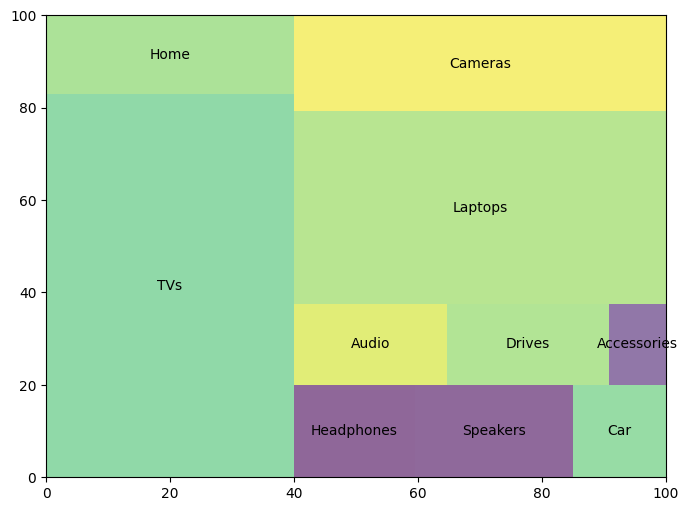

In [ ]:
# most dominant products in price listings
import matplotlib.pyplot as plt # Import matplotlib for plotting
import squarify # Import the squarify library

# Get the top 10 categories
plots = df1['Categories'].value_counts().iloc[:10]

# Assuming 'Average_Price' is a column in your DataFrame associated with categories:
# Get the average price for each of the top 10 categories
average_prices = df1.groupby('Categories')['Average_Price'].mean()[plots.index]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
squarify.plot(sizes=average_prices, label=plots.index, alpha=0.6, ax=ax)
plt.show() # Display the plot

In [ ]:
#*************************************Removing Stopwords *******************************
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#print(stopwords.words('english'))
def remove_stopwords(text):
  clean_text=' '.join([i for i in text.split() if i not in stopwords.words('english')])
  return clean_text

df['name']=df['name'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#*************************************Removing Punctuations *******************************
import string

def remove_punctuation(text):
  cleantext=''.join([i for i in text if i not in string.punctuation])
  return cleantext

df['name']=df['name'].apply(lambda x:remove_punctuation(x))
#*************************************Lowering the Text *******************************
df['name']=df['name'].str.lower()

In [ ]:
#*************************************Stemming *******************************
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stemming(text):
  clean_text=' '.join([ps.stem(i) for i in text.split()])
  return clean_text

df['name']=df['name'].apply(lambda x:stemming(x))


In [ ]:
#*************************************Lemmatization *******************************
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
nltk.download('wordnet')
def Lemmatize(text):
  clean_text=' '.join([wl.lemmatize(i) for i in text.split()])
  return clean_text

df['name']=df['name'].apply(lambda x:Lemmatize(x))
df['name']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,name
0,sanu vlf410b1 10inch super slim fullmot mount ...
1,boyton 2500w 21ch home theater system black di...
2,boyton 2500w 21ch home theater system black di...
3,boyton 2500w 21ch home theater system black di...
4,boyton 2500w 21ch home theater system black di...
...,...
7244,lowepro slingshot edg 250 aw camera backpack b...
7245,lowepro slingshot edg 250 aw camera backpack b...
7246,lowepro slingshot edg 250 aw camera backpack b...
7247,lowepro slingshot edg 250 aw camera backpack b...


In [ ]:
#*************************************Tokenization *******************************

import nltk
from nltk.tokenize import word_tokenize ,sent_tokenize
nltk.download('punkt')

word_cnt,unique_word_cnt=0,0

#Corpus of the entire Document
corpus=df['name'].str.cat(sep=', ')
#print('corpus:',corpus)
print('Number of words in the entire corpus:',len(corpus))
#Find the letters used in Corpus
Unique_char=set(df['name'].str.cat(sep=', '))
#print('Unique letters used in corpus:',Unique_char)

Vocabulary = df['name'].str.cat(sep=', ')
#print(set(word_tokenize(Vocabulary[:20])))
for i in set(word_tokenize(Vocabulary)):
  unique_word_cnt+=1
print('Number of words in the vocabulary:',unique_word_cnt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of words in the entire corpus: 405818
Number of words in the vocabulary: 2185


Encoding and Transforming the data (20 points)
Encoding the target variable

Bag of Words

TF-IDF

Train-Test Split

In [ ]:
#*************************************Bag of Words *******************************
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(df['name'])
print("\nVocabulary:")
vocab_items = list(cv.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")

# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())
#print('Frequency of words',bow.toarray().sum(axis=0))
#print('words in vocabulary',cv.get_feature_names_out())


Vocabulary:
sanu: 1697
vlf410b1: 2048
10inch: 28
super: 1881
slim: 1777
fullmot: 971
mount: 1351
37: 216
84: 383
inch: 1128
Bag of Words Matrix: (7249, 2154)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
 #*************************************TFIDF - Term Frequency/Inverse Document Frequency *******************************
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
#print(tfidf.idf_)
TFIDF=tfidf.fit_transform(df['name'])
print("\nVocabulary:")
vocab_items = list(tfidf.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")
#print(tfidf.vocabulary_)

# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())


Vocabulary:
sanu: 1697
vlf410b1: 2048
10inch: 28
super: 1881
slim: 1777
fullmot: 971
mount: 1351
37: 216
84: 383
inch: 1128
TFIDF Matrix: (7249, 2154)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#*************************************Train-test split *******************************
X=df['name']
#X=tfidf.fit_transform(df['Article'])
y=df['primaryCategories_id']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5799,), (1450,), (5799,), (1450,))

In [ ]:
def conf_matrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  conf_mat = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_mat, annot=True, xticklabels=df['primaryCategories'].unique(), yticklabels=df['primaryCategories'].unique(), cmap="YlGnBu", fmt='g')

Exploring Multi-classification Models(classification models)
5. Model Training & Evaluation (30 points)

Simple Approach - Naive Bayes

Functionalized Code (Optional)- Decision Tree,Nearest Neighbors,RandomForest

(5799,) (1450,) (5799,) (1450,)
accuracy 0.996551724137931
['Electronics']
['Electronics']
                       precision    recall  f1-score   support

        Apple CarPlay       1.00      1.00      1.00         9
        Intel Celeron       0.00      0.00      0.00         3
       Siri Eyes Free       0.00      0.00      0.00         1
          Electronics       1.00      1.00      1.00      1436
Electronics,Furniture       0.00      0.00      0.00         1

             accuracy                           1.00      1450
            macro avg       0.40      0.40      0.40      1450
         weighted avg       0.99      1.00      0.99      1450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


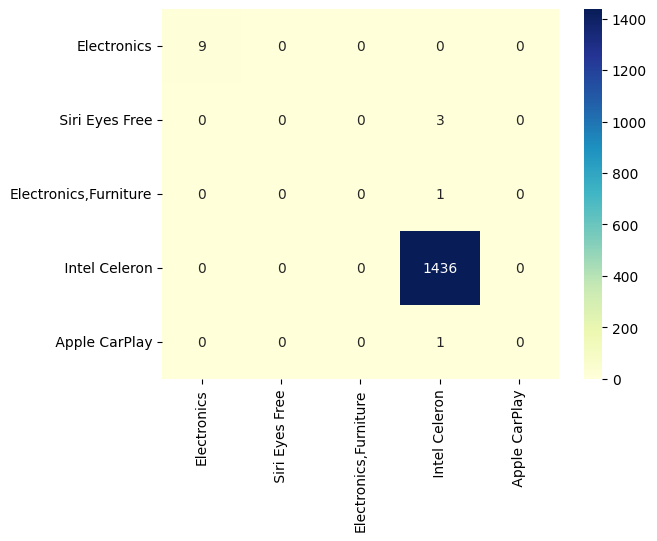

In [ ]:
# 1. Naive Bayes - MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df['name']
y = df['primaryCategories']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas."
print(nb.predict([complaint]))
complaint = "tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow people to record store play pause and forward wind tv programmes when they want. essentially the technology allows for much more personalised tv. they are also being built-in to high-definition tv sets which are big business in japan and the us but slower to take off in europe because of the lack of high-definition programming. not only can people forward wind through adverts they can also forget about abiding by network and channel schedules putting together their own a-la-carte entertainment. but some us networks and cable and satellite companies are worried about what it means for them in terms of advertising revenues as well as brand identity and viewer loyalty to channels. although the us leads in this technology at the moment it is also a concern that is being raised in europe particularly with the growing uptake of services like sky+. what happens here today we will see in nine months to a years time in the uk adam hume the bbc broadcast s futurologist told the bbc news website. for the likes of the bbc there are no issues of lost advertising revenue yet. it is a more pressing issue at the moment for commercial uk broadcasters but brand loyalty is important for everyone. we will be talking more about content brands rather than network brands said tim hanlon from brand communications firm starcom mediavest. the reality is that with broadband connections anybody can be the producer of content. he added: the challenge now is that it is hard to promote a programme with so much choice. what this means said stacey jolna senior vice president of tv guide tv group is that the way people find the content they want to watch has to be simplified for tv viewers. it means that networks in us terms or channels could take a leaf out of google s book and be the search engine of the future instead of the scheduler to help people find what they want to watch. this kind of channel model might work for the younger ipod generation which is used to taking control of their gadgets and what they play on them. but it might not suit everyone the panel recognised. older generations are more comfortable with familiar schedules and channel brands because they know what they are getting. they perhaps do not want so much of the choice put into their hands mr hanlon suggested. on the other end you have the kids just out of diapers who are pushing buttons already - everything is possible and available to them said mr hanlon. ultimately the consumer will tell the market they want. of the 50 000 new gadgets and technologies being showcased at ces many of them are about enhancing the tv-watching experience. high-definition tv sets are everywhere and many new models of lcd (liquid crystal display) tvs have been launched with dvr capability built into them instead of being external boxes. one such example launched at the show is humax s 26-inch lcd tv with an 80-hour tivo dvr and dvd recorder. one of the us s biggest satellite tv companies directtv has even launched its own branded dvr at the show with 100-hours of recording capability instant replay and a search function. the set can pause and rewind tv for up to 90 hours. and microsoft chief bill gates announced in his pre-show keynote speech a partnership with tivo called tivotogo which means people can play recorded programmes on windows pcs and mobile devices. all these reflect the increasing trend of freeing up multimedia so that people can watch what they want when they want."
print(nb.predict([complaint]))

print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

accuracy 1.0
                       precision    recall  f1-score   support

        Apple CarPlay       1.00      1.00      1.00         7
        Intel Celeron       1.00      1.00      1.00         2
       Siri Eyes Free       1.00      1.00      1.00         1
          Electronics       1.00      1.00      1.00      1438
Electronics,Furniture       1.00      1.00      1.00         2

             accuracy                           1.00      1450
            macro avg       1.00      1.00      1.00      1450
         weighted avg       1.00      1.00      1.00      1450



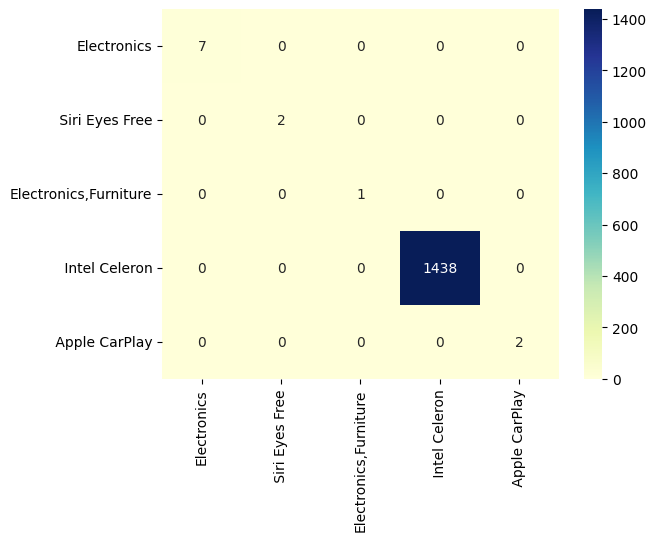

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

#Convert 'name' column to numerical features using CountVectorizer
X=cv.fit_transform(df['name']).toarray()
# 'primaryCategories' should already be numerical or categorical labels.
# No need to apply CountVectorizer to it.
y=df['primaryCategories'] # This assumes 'primaryCategories_id' is your target
# or if 'primaryCategories' contains category labels
# y = df['primaryCategories']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Get unique classes from both train and test sets
unique_classes = np.union1d(y_train.unique(), y_test.unique())

RFC = RandomForestClassifier(random_state=7, criterion='gini')
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))

# Use unique classes from BOTH train and test sets for target_names
print(classification_report(y_test, y_pred, target_names=unique_classes))

conf_matrix(y_test, y_pred)